In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
sns.set()
%matplotlib inline

In [14]:
from scipy import optimize

In [15]:
plt.rcParams['figure.figsize'] = [16, 9]

In [16]:
df = pd.read_csv(r'Complied/final_overall_kwhdel_compilation_2016-2020.csv',parse_dates=['Timestamp'], index_col='Timestamp')

In [17]:
def p(data):
    d = data.fillna(0)
    dd = d[(d>0) & (d<10*data.median())]
#     dd.plot(figsize=(16,9))

In [18]:
def kdd(data, n=3):
    d = data.fillna(0)
    dd = d[(d>0) & (d<10*data.median())]
    kmeans = KMeans(n_clusters=n)
    labels = kmeans.fit_predict(dd.values.reshape(-1,1))
    return dd, labels

In [19]:
def get_b(data):
    d, result = kdd(data)
    upper = [(d[result == i]).max() for i in np.unique(result)]
    lower = [(d[result == i]).min() for i in np.unique(result)]
    bound = upper + lower
    bound.sort()
    b1 = (bound[1] + bound[2])/2
    b2 = (bound[3] + bound[4])/2
    b3 = bound[5] + 1
    return [b1, b2, b3]

In [20]:
def plot_pattern(data):
    p(data)
    d, _ = kdd(data)
    limit = get_b(data)
    
    q1 = d < limit[0]
    q1_group = q1.groupby((q1 != q1.shift()).cumsum())
    q1_group_f = q1_group.sum()[q1_group.sum() > 0]
    q1_index = q1_group_f[q1_group_f > 96*7].index
    
    if len(q1_index) != 0:
        q1_left = [q1_group.get_group(i).index[0] for i in q1_index]
        q1_right = [q1_group.get_group(i).index[-1] for i in q1_index]
        for i, j in zip(q1_left, q1_right):
            plt.axvspan(str(i), str(j), alpha=0.5, color='r')
            
    q2 = d < limit[1]
    q2_group = q2.groupby((q2 != q2.shift()).cumsum())
    q2_group_f = q2_group.sum()[q2_group.sum() > 0]
    q2_index = q2_group_f[q2_group_f > 96*7].index
    
    if len(q2_index) != 0:
        q2_left = [q2_group.get_group(i).index[0] for i in q2_index]
        q2_right = [q2_group.get_group(i).index[-1] for i in q2_index]
        for i, j in zip(q2_left, q2_right):
            plt.axvspan(str(i), str(j), alpha=0.5, color='r')

In [21]:
d = df['MO0106ZZ']['2018'].copy()

In [23]:
d

Timestamp
2018-01-01 00:00:00    513.511
2018-01-01 00:15:00    532.054
2018-01-01 00:30:00    524.208
2018-01-01 00:45:00    515.141
2018-01-01 01:00:00    519.552
                        ...   
2018-12-31 22:45:00    354.643
2018-12-31 23:00:00    362.990
2018-12-31 23:15:00    356.042
2018-12-31 23:30:00    338.867
2018-12-31 23:45:00    355.856
Name: MO0106ZZ, Length: 35036, dtype: float64

Text(0.5, 1.0, 'MO106ZZ - 2018')

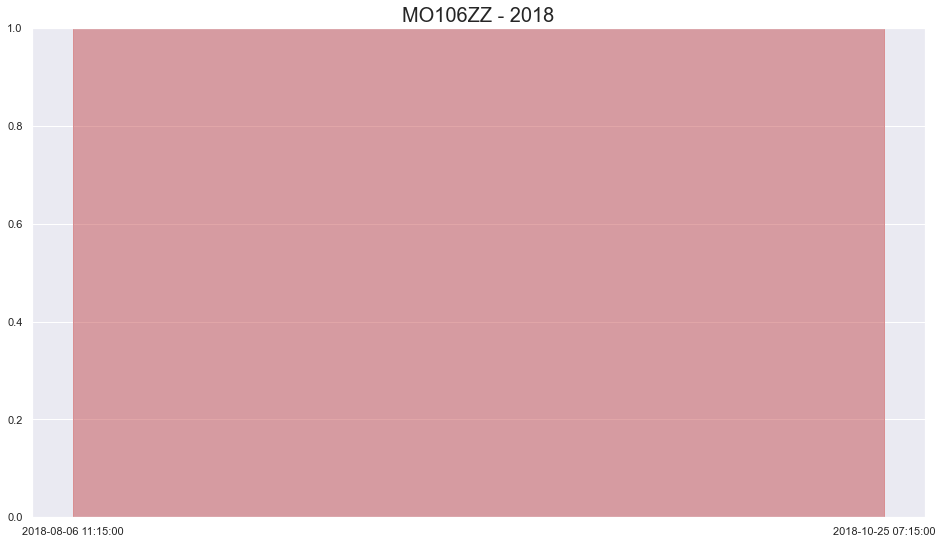

In [22]:
plot_pattern(d)
plt.title('MO106ZZ - 2018', fontsize=20)

In [12]:
d = d_t['MO0106ZZ']
p(d)
d, _ = kdd(d)
limit = get_b(d)
    
q1 = d < limit[1]
q1_group = q1.groupby((q1 != q1.shift()).cumsum())
q1_group_f = q1_group.sum()[q1_group.sum() > 0]
q1_index = q1_group_f[q1_group_f > 96*7].index

NameError: name 'd_t' is not defined

In [ ]:
q1_left = [q1_group.get_group(i).index[0] for i in q1_index]
q1_right = [q1_group.get_group(i).index[-1] for i in q1_index]

In [ ]:
q1_left, q1_right

In [ ]:
d = df['MO0106ZZ'].resample('H').sum()
dff = pd.read_csv(r'Imputation/Data-Extract-St-Louis.csv')
data = pd.concat([pd.DataFrame(d.index),pd.DataFrame(d.values), dff[:43825]],axis=1)
data = data.set_index('Timestamp')
data = data.drop('validdate',1)
data = data.rename(columns = {0:'MO0106ZZ'})
dt = data.iloc[:, :2]
dtt = dt[dt.iloc[:, 0] > 10]
dtt = dtt.rename(columns = {'t_2m:C':'Outdoor Temperature'})
d_2018 = dtt.loc['2018']
d_t = d_2018.copy()

In [30]:
d_t['label'] = 1

In [41]:
d_t.loc[q1_left[0]: q1_right[0]].label = 0

/Users/tianjinzhao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [23]:
def piecewise_linear2(x, x0, x1, y0, k1, k2):
    return np.piecewise(x, [x < x0, (x > x0) & (x < x1) ,x > x1], [lambda x: y0 + k1 * (x - x0), lambda x: y0, lambda x: y0 + k2 * ( x - x1)])

In [47]:
data = d_t[d_t.label == 1]

In [57]:
p

array([   5.17424007,   79.24374049, 2707.02536514,  -99.5097284 ,
         -5.15343447])

In [1]:
import piecewise_regression

In [48]:
x = data[data.index.weekday < 5].between_time('6:00', '16:00').iloc[:,1].values
y = data[data.index.weekday < 5].between_time('6:00', '16:00').iloc[:,0].values

In [53]:
p, e = optimize.curve_fit(piecewise_linear2, x, y)

/Users/tianjinzhao/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0, 0.5, 'Electricity Consumption (kWh)')

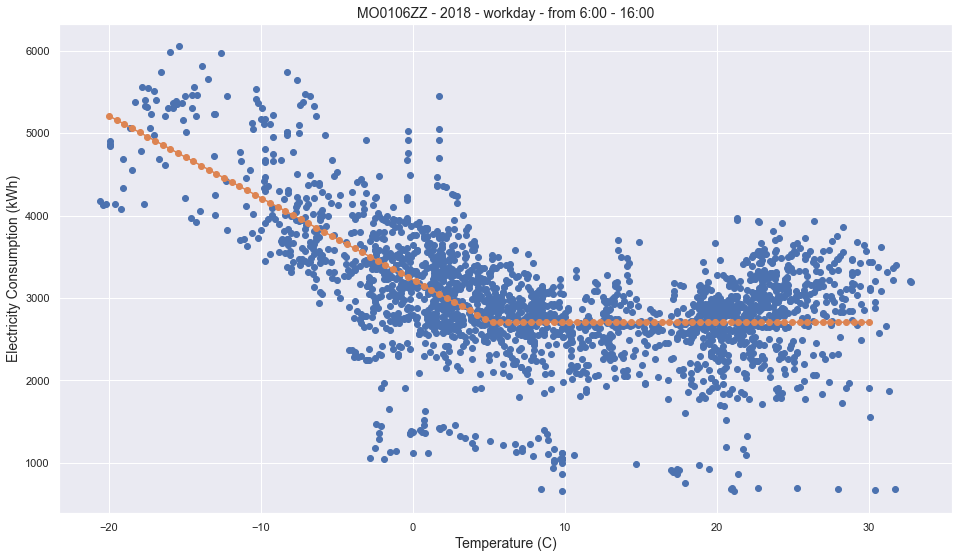

In [56]:
plt.plot(x, y, 'o')
xd = np.linspace(-20, 30, 100)
plt.plot(xd, piecewise_linear2(xd, *p), '-o')
plt.title('MO0106ZZ - 2018 - workday - from 6:00 - 16:00', fontsize=14)
plt.xlabel('Temperature (C)', fontsize=14)
plt.ylabel('Electricity Consumption (kWh)', fontsize=14)

In [58]:
## Lean for one year dataset